In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# обучающая выборка
train = pd.read_csv('/content/train_alexa.csv')
train.head()

ClientID  Freq  Monetary  Recently  Last_First  UniqueItems  \
0  client42185    76     57813       400         329           67   
1  client40742    23      2694        61         668           21   
2  client15108    69     56747        51         678           61   
3  client11153    45     24396        63         666           43   
4  client13931     8      1957       315         414            8   

   UniqueGroupItems  LastAmount  Weekend                  FavGroup  \
0                 9         199      3.0           Кафель и плитка   
1                 6          80      NaN  Товары для дачи и отдыха   
2                12        1457      7.0         Столярные изделия   
3                10        4144      3.0  Товары для дачи и отдыха   
4                 3         368      1.0             Лаки и краски   

   WeekendShare  LastAmountShare  Event  
0          21.0                0  False  
1           NaN                3  False  
2          35.0                3   True  
3          25.0               17  False  
4          50.0               19  False

***Описание признаков:***
* ClientID – идентификатор клиента;
* Freq – частота посещений;
* Monetary – потраченная сумма за все визиты;
* Recently – давность посещения;
* Last_First – число дней между первым и последним визитом;
* UniqueItems – количество уникальных товаров;
* UniqueItemGroups – количество уникальных товарных групп;
* LastAmount – потраченная сумма за последний визит (абсолютное значение);
* Weekend – количество визитов в выходные дни (абсолютное значение);
* LastAmountShare – доля трат в последнем визите (в %);
* WeekendShare – доля визитов в выходные дни (в %);
* FavGroup – наиболее востребованная группа;
* Event – событие (посетит/не посетит).

In [ ]:
# тестовая выборка
test = pd.read_csv('/content/test_alexa.csv')
test.shape

(41196, 13)

## Предварительная обработка данных

In [ ]:
# просматриваю обучающую выборку на наличие в ней пропущенных значений
train.isnull().mean()

ClientID            0.000000
Freq                0.000000
Monetary            0.000000
Recently            0.000000
Last_First          0.000000
UniqueItems         0.000000
UniqueGroupItems    0.000000
LastAmount          0.000000
Weekend             0.344535
FavGroup            0.000000
WeekendShare        0.344535
LastAmountShare     0.000000
Event               0.000000
dtype: float64

In [ ]:
# замена пустых значений на нули
train = train.fillna(0)
# замена значений True/False на 1/0
train = train.replace({'Event': {True: 1, False: 0}})

In [ ]:
# проделываю всё то же самое с тестовой выборкой
# замена пустых значений на нули
test = test.fillna(0)
# замена значений True/False на 1/0
test = test.replace({'Event': {True: 1, False: 0}})

In [ ]:
# создаю датасет факторов 
# все, кроме результирующего показателя Event, и факторов ClientID и UniqueItems
variable_names = [x for x in list(train.columns) if x not in ['ClientID', 'Event', 'UniqueItems']]
x_train = train[variable_names]   # факторы обучающей выборки
x_train.head()

Freq  Monetary  Recently  Last_First  UniqueGroupItems  LastAmount  \
0    76     57813       400         329                 9         199   
1    23      2694        61         668                 6          80   
2    69     56747        51         678                12        1457   
3    45     24396        63         666                10        4144   
4     8      1957       315         414                 3         368   

   Weekend                  FavGroup  WeekendShare  LastAmountShare  
0      3.0           Кафель и плитка          21.0                0  
1      0.0  Товары для дачи и отдыха           0.0                3  
2      7.0         Столярные изделия          35.0                3  
3      3.0  Товары для дачи и отдыха          25.0               17  
4      1.0             Лаки и краски          50.0               19

In [ ]:
y_train = train.Event   # результирующий показатель обучающей выборки

In [ ]:
# проделываю всё то же самое с тестовой выборкой
x_test = test[variable_names]   # факторы тестовой выборки
x_test.head()

Freq  Monetary  Recently  Last_First  UniqueGroupItems  LastAmount  \
0    76     57813       430         329                 9         199   
1    23      2694        91         668                 6          80   
2    69     56747        81         678                12        1457   
3    45     24396        93         666                10        4144   
4     8      1957       345         414                 3         368   

   Weekend                  FavGroup  WeekendShare  LastAmountShare  
0      3.0           Кафель и плитка          21.0                0  
1      0.0  Товары для дачи и отдыха           0.0                3  
2      7.0         Столярные изделия          35.0                3  
3      3.0  Товары для дачи и отдыха          25.0               17  
4      1.0             Лаки и краски          50.0               19

In [ ]:
y_test = test.Event   # результирующий показатель тестовой выборки

## WoE-анализ

In [ ]:
pip install optbinning

In [ ]:
from optbinning import BinningProcess

In [ ]:
selection_criteria = {'iv': {'min': 0.02}}

### для обучающей выборки

In [ ]:
# инициализация и обучение
binning_process = BinningProcess(variable_names, selection_criteria = selection_criteria, max_n_bins=6)
binning_process.fit(x_train, y_train)

BinningProcess(max_n_bins=6, selection_criteria={'iv': {'min': 0.02}},
               variable_names=['Freq', 'Monetary', 'Recently', 'Last_First',
                               'UniqueGroupItems', 'LastAmount', 'Weekend',
                               'FavGroup', 'WeekendShare', 'LastAmountShare'])

In [ ]:
binning_process.information(print_level=2)

optbinning (Version 0.17.1)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    max_n_prebins                         20   * d
    min_prebin_size                     0.05   * d
    min_n_bins                            no   * d
    max_n_bins                             6   * U
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    max_pvalue                            no   * d
    max_pvalue_policy            consecutive   * d
    selection_criteria                   yes   * U
    fixed_variables                       no   * d
    categorical_variables                 no   * d
    special_codes                         no   * d
    split_digits                          no   * d
    binning_fit_params                    no   * d
    binning_transform_params              no   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                  399

In [ ]:
binning_process.summary()

name        dtype   status  selected n_bins        iv  \
0              Freq    numerical  OPTIMAL      True      6  0.636572   
1          Monetary    numerical  OPTIMAL      True      6  0.431581   
2          Recently    numerical  OPTIMAL      True      6  0.913079   
3        Last_First    numerical  OPTIMAL      True      6  0.502945   
4  UniqueGroupItems    numerical  OPTIMAL      True      6  0.585591   
5        LastAmount    numerical  OPTIMAL      True      6  0.056953   
6           Weekend    numerical  OPTIMAL      True      6  0.596618   
7          FavGroup  categorical  OPTIMAL      True      6  0.067872   
8      WeekendShare    numerical  OPTIMAL      True      6   0.52248   
9   LastAmountShare    numerical  OPTIMAL      True      6   0.51071   

         js      gini quality_score  
0   0.07513   0.42587      0.643413  
1  0.051658  0.354982      0.913487  
2  0.104532  0.495019      0.246378  
3  0.060147   0.36513      0.785521  
4  0.069999  0.414469      0.755047  
5  0.007097  0.132499      0.195523  
6  0.070171   0.39971      0.688676  
7  0.008416  0.140406      0.251777  
8  0.063098  0.388866       0.81822  
9  0.061149  0.377946      0.836583

In [ ]:
# расчет значений для конкретного признака
optb = binning_process.get_binned_variable('WeekendShare')
optb.binning_table.build()

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0         (-inf, 1.50)  13749   0.344535      12459   1290    0.093825   
1        [1.50, 25.50)   5945   0.148975       4084   1861    0.313036   
2       [25.50, 32.50)   2070   0.051872       1192    878    0.424155   
3       [32.50, 49.50)   6340   0.158873       4534   1806    0.284858   
4       [49.50, 87.00)   6860   0.171904       5677   1183    0.172449   
5         [87.00, inf)   4942   0.123841       4613    329    0.066572   
6              Special      0   0.000000          0      0    0.000000   
7              Missing      0   0.000000          0      0    0.000000   
Totals                  39906   1.000000      32559   7347    0.184108   

             WoE        IV        JS  
0       0.779039  0.161321  0.019670  
1      -0.702799  0.089865  0.011007  
2      -1.183021  0.098065  0.011590  
3      -0.568272  0.060555  0.007469  
4       0.079608  0.001062  0.000133  
5       1.151814  0.111612  0.013228  
6            0.0  0.000000  0.000000  
7            0.0  0.000000  0.000000  
Totals            0.522480  0.063098

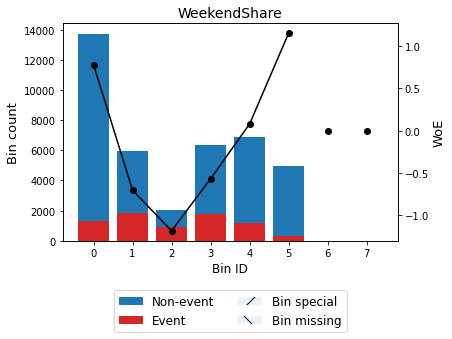

In [ ]:
# визуализация
optb.binning_table.plot(metric='woe')

In [ ]:
optb.binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.38886622
    IV (Jeffrey)             0.52248049
    JS (Jensen-Shannon)      0.06309753
    Hellinger                0.06417562
    Triangular               0.24437646
    KS                       0.20707730
    HHI                      0.21371672
    HHI (normalized)         0.10139054
    Cramer's V               0.27813744
    Quality score            0.81821950

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]     P[B > A]
        0      1  1483.950962 0.000000e+00 0.000000e+00 1.000000e+00
        1      2    84.275447 4.304277e-20 7.692310e-43 1.000000e+00
        2      3   139.348544 3.695511e-32 1.000000e+00 1.110223e-16
        3      4   237.681720 1.259517e-53 1.000000e+00 1.110223e-16
        4      5   288.281276 1.1

In [ ]:
xtrain_transform = binning_process.transform(x_train, metric='woe')
xtrain_transform

Freq  Monetary  Recently  Last_First  UniqueGroupItems  LastAmount  \
0     -1.593880 -1.382229  1.886370   -0.391250         -0.641889   -0.287731   
1     -0.124067  0.530198 -0.328925   -1.049649         -0.095522   -0.168558   
2     -0.922595 -1.382229 -0.328925   -1.049649         -1.297094    0.140763   
3     -0.922595 -0.761234 -0.328925   -1.049649         -1.297094    0.246316   
4      0.389100  0.967065  0.663046   -0.391250          0.763142   -0.287731   
...         ...       ...       ...         ...               ...         ...   
39901  1.016494 -0.292758 -1.189332    1.189184          0.763142    0.334848   
39902  1.016494  0.967065 -1.189332    1.189184          1.106736   -0.168558   
39903  1.016494  0.967065 -1.189332    1.189184          1.106736   -0.168558   
39904  1.016494  0.135935 -1.189332    1.189184          1.106736    0.334848   
39905  1.016494  0.967065 -1.189332    1.189184          1.106736   -0.287731   

        Weekend  FavGroup  WeekendShare  LastAmountShare  
0     -0.633078 -0.097796     -0.702799        -0.899803  
1      0.779039  0.450196      0.779039        -0.593214  
2     -1.735066 -0.097796     -0.568272        -0.593214  
3     -0.633078  0.450196     -0.702799        -0.257126  
4      0.460716 -0.012771      0.079608        -0.257126  
...         ...       ...           ...              ...  
39901  0.460716 -0.503528      1.151814         1.186749  
39902  0.460716 -0.503528      1.151814         1.186749  
39903  0.460716 -0.012771      1.151814         1.186749  
39904  0.460716 -0.503528      1.151814         1.186749  
39905  0.460716  0.450196      1.151814         1.186749  

[39906 rows x 10 columns]

### для тестовой выборки

In [ ]:
binning_process.fit(x_test, y_test)

BinningProcess(max_n_bins=6, selection_criteria={'iv': {'min': 0.02}},
               variable_names=['Freq', 'Monetary', 'Recently', 'Last_First',
                               'UniqueGroupItems', 'LastAmount', 'Weekend',
                               'FavGroup', 'WeekendShare', 'LastAmountShare'])

In [ ]:
binning_process.information(print_level=2)

In [ ]:
binning_process.summary()

name        dtype   status  selected n_bins        iv  \
0              Freq    numerical  OPTIMAL      True      6  0.674272   
1          Monetary    numerical  OPTIMAL      True      6  0.465815   
2          Recently    numerical  OPTIMAL      True      6  1.195691   
3        Last_First    numerical  OPTIMAL      True      6  0.532519   
4  UniqueGroupItems    numerical  OPTIMAL      True      6  0.616426   
5        LastAmount    numerical  OPTIMAL      True      6  0.056014   
6           Weekend    numerical  OPTIMAL      True      6  0.628824   
7          FavGroup  categorical  OPTIMAL      True      6  0.075285   
8      WeekendShare    numerical  OPTIMAL      True      6  0.539294   
9   LastAmountShare    numerical  OPTIMAL      True      6  0.559447   

         js      gini quality_score  
0  0.079308  0.438266      0.590357  
1  0.055717  0.368739      0.880802  
2  0.133263  0.559266      0.048541  
3  0.063127  0.372502       0.77489  
4  0.073325  0.424119      0.687664  
5  0.006979  0.130278      0.192433  
6  0.073705  0.410138      0.643566  
7   0.00933  0.148433       0.23407  
8  0.064992  0.393594      0.799914  
9  0.066424  0.390741      0.779728

In [ ]:
optb.binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.38886622
    IV (Jeffrey)             0.52248049
    JS (Jensen-Shannon)      0.06309753
    Hellinger                0.06417562
    Triangular               0.24437646
    KS                       0.20707730
    HHI                      0.21371672
    HHI (normalized)         0.10139054
    Cramer's V               0.27813744
    Quality score            0.81821950

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]     P[B > A]
        0      1  1483.950962 0.000000e+00 0.000000e+00 1.000000e+00
        1      2    84.275447 4.304277e-20 7.692310e-43 1.000000e+00
        2      3   139.348544 3.695511e-32 1.000000e+00 1.110223e-16
        3      4   237.681720 1.259517e-53 1.000000e+00 1.110223e-16
        4      5   288.281276 1.1

In [ ]:
xtest_transform = binning_process.transform(x_test, metric='woe')
xtest_transform

Freq  Monetary  Recently  Last_First  UniqueGroupItems  LastAmount  \
0     -1.608765 -1.306504  2.153916   -0.368147         -0.927709   -0.228350   
1     -0.040188  0.459357  0.162120   -1.104690         -0.091594   -0.228350   
2     -0.920812 -1.306504  0.162120   -1.104690         -1.446106    0.246061   
3     -0.920812 -0.445115  0.162120   -1.104690         -0.927709    0.246061   
4      0.417846  1.017373  0.906717   -0.368147          0.473251   -0.385150   
...         ...       ...       ...         ...               ...         ...   
41191  1.084740  0.459357 -1.617646    1.303954          1.046015    0.246061   
41192  1.084740  1.017373 -1.617646    1.303954          1.046015    0.246061   
41193  1.084740  0.459357 -1.617646    1.303954          1.046015    0.246061   
41194  1.084740  0.459357 -1.617646    1.303954          1.046015    0.246061   
41195  1.084740  1.017373 -1.617646    1.303954          1.046015   -0.166341   

        Weekend  FavGroup  WeekendShare  LastAmountShare  
0     -0.620854 -0.107590     -0.689444        -0.867050  
1      0.809754  0.496805      0.809754        -0.483846  
2     -1.770140 -0.107590     -0.568563        -0.483846  
3     -0.620854  0.496805     -0.689444        -0.170558  
4      0.487198 -0.107590      0.060588        -0.170558  
...         ...       ...           ...              ...  
41191  0.809754 -0.512458      0.809754         1.319079  
41192  0.809754  0.068156      0.809754         1.319079  
41193  0.809754 -0.107590      0.809754         1.319079  
41194  0.809754  0.068156      0.809754         1.319079  
41195  0.809754 -0.512458      0.809754         1.319079  

[41196 rows x 10 columns]

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

In [ ]:
# инициализация и обучение
logr = LogisticRegression().fit(xtrain_transform, y_train)
# предсказанные значения результирующего показателя
logr_pred = logr.predict(xtest_transform)

In [ ]:
# прогнозирование вероятностей для тестовых данных
logr_proba = logr.predict_proba(xtest_transform)
logr_proba

array([[0.8953377 , 0.1046623 ],
       [0.89823481, 0.10176519],
       [0.67506461, 0.32493539],
       ...,
       [0.73452314, 0.26547686],
       [0.74726368, 0.25273632],
       [0.69117331, 0.30882669]])

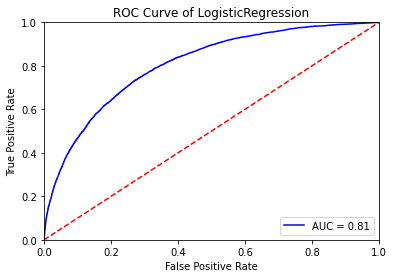

In [ ]:
# вероятности положительного класса
fpr, tpr, thresholds = roc_curve(y_test, logr_proba[:,1], drop_intermediate=False)

# графически

LOGR = roc_auc_score(y_test, logr_proba[:,1])
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % LOGR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LogisticRegression')
plt.show()

Значение индекса AUC = 0.81, что говорит о хорошем качестве классификации.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# инициализация и обучение
rfc = RandomForestClassifier()
rfc.fit(xtrain_transform, y_train)

# предсказанные значения результирующего показателя
rfc_pred = rfc.predict(xtest_transform)

In [ ]:
# прогнозирование вероятностей для тестовых данных
rfc_proba = rfc.predict_proba(xtest_transform)
rfc_proba

array([[0.97      , 0.03      ],
       [0.52      , 0.48      ],
       [0.71      , 0.29      ],
       ...,
       [0.75494036, 0.24505964],
       [1.        , 0.        ],
       [0.19119444, 0.80880556]])

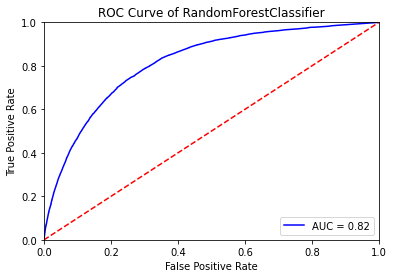

In [ ]:
# вероятности положительного класса
fpr, tpr, thresholds = roc_curve(y_test, rfc_proba[:,1], drop_intermediate=False)

# графически

RFC = roc_auc_score(y_test, rfc_proba[:,1])
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % RFC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of RandomForestClassifier')
plt.show()

Значение индекса AUC по модели случайного леса на 0.01 больше значения AUC логистической регрессии.

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# инициализация и обучение
gbc = GradientBoostingClassifier()
gbc.fit(xtrain_transform, y_train)

# предсказанные значения результирующего показателя
gbc_pred = gbc.predict(xtest_transform)

In [ ]:
# прогнозирование вероятностей для тестовых данных
gbc_proba = gbc.predict_proba(xtest_transform)
gbc_proba

array([[0.93233828, 0.06766172],
       [0.86373023, 0.13626977],
       [0.69531487, 0.30468513],
       ...,
       [0.78346655, 0.21653345],
       [0.80472007, 0.19527993],
       [0.6736185 , 0.3263815 ]])

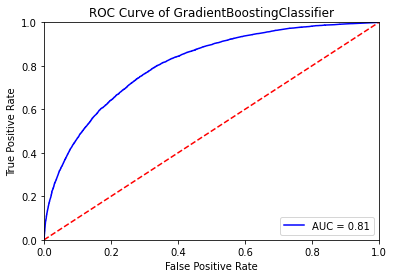

In [ ]:
# вероятности положительного класса
fpr, tpr, thresholds = roc_curve(y_test, gbc_proba[:,1], drop_intermediate=False)

# графически

GBC = roc_auc_score(y_test, gbc_proba[:,1])
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % GBC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of GradientBoostingClassifier')
plt.show()

Значение индекса AUC также, как и для предыдущего классификатора, равно 0.81, что говорит об очень хорошем качестве построенной модели.

## Сравнение метрик

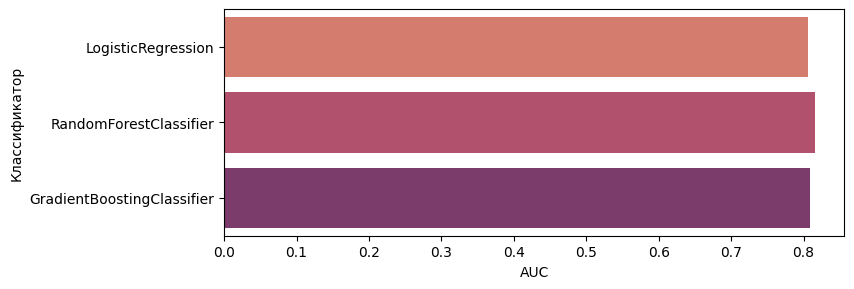

In [ ]:
total = pd.DataFrame({'Классификатор':['LogisticRegression',
                                      'RandomForestClassifier',
                                       'GradientBoostingClassifier'], 
                      'AUC':[LOGR, RFC, GBC]})
plt.subplots(figsize=(8, 3), dpi=100)
sns.barplot(data=total, y='Классификатор', x = 'AUC', estimator=sum, ci=None, palette='flare')
plt.show()

Полагаясь на построенную выше диаграмму, можно сделать вывод, что модель случайного леса оказалась наилучшим классификатором для исходных данных.

In [ ]:
total

Классификатор       AUC
0          LogisticRegression  0.806199
1      RandomForestClassifier  0.815358
2  GradientBoostingClassifier  0.808803